In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
sns.set_style("darkgrid")


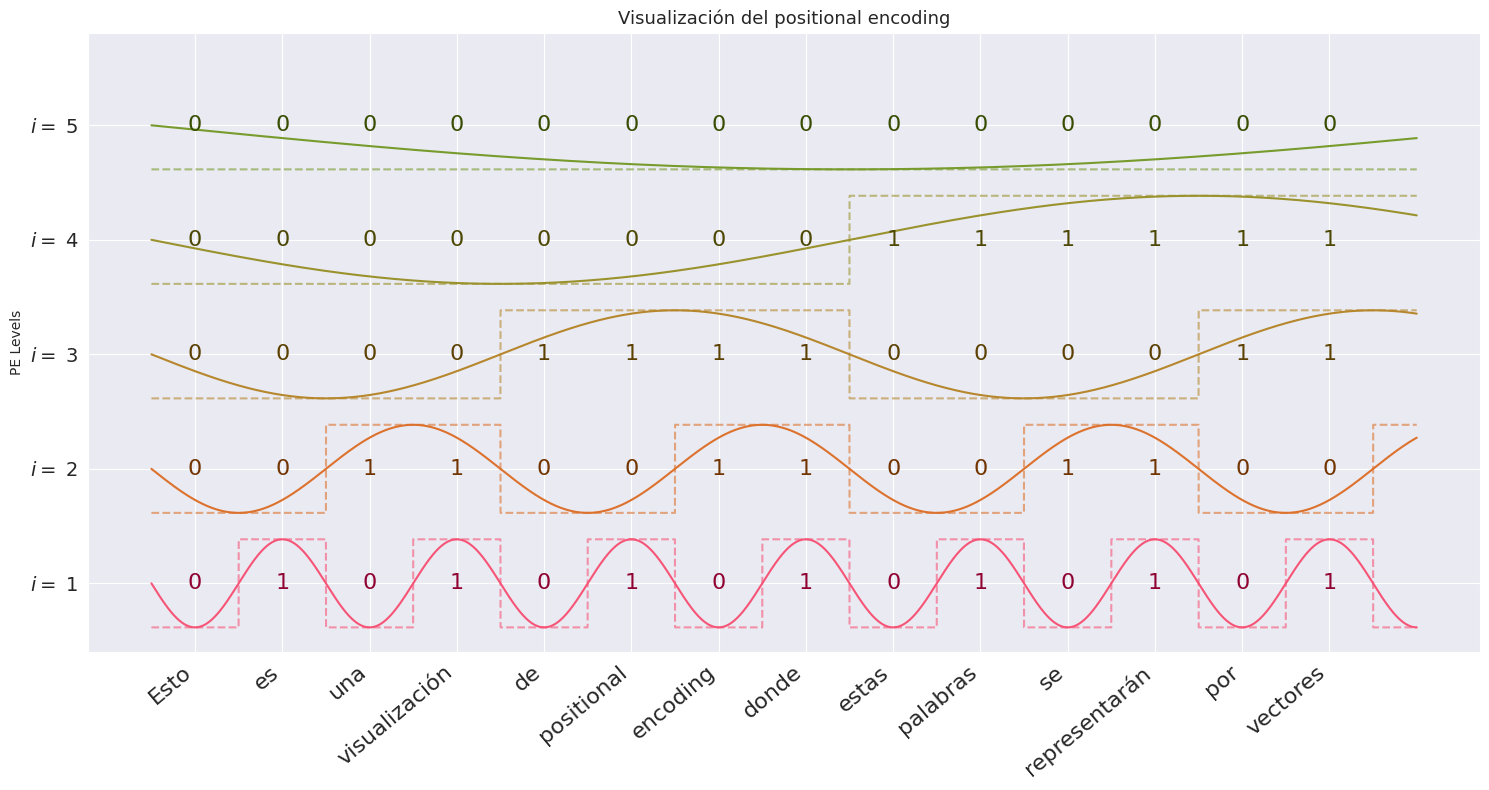

In [2]:
# Frase de ejemplo
sentence = "Esto es una visualización de positional encoding donde estas palabras se representarán por vectores"
tokens = sentence.split()

def cos2(x_vect,freq,offset):
    return np.cos((x_vect-offset) * (2*np.pi)/freq )

def squared_cos2(x_vect, freq,offset):
    cos_values = cos2(x_vect, freq,offset)
    return np.where(cos_values > 0, 1, -1)

# Configurar plot
fig, ax = plt.subplots(figsize=(15, 8))
N=10000
x = np.linspace(-0.5,len(tokens),N)
y = np.linspace(0, 2 * np.pi, len(tokens))

n_colors = len(tokens)
pastel_rainbow = sns.husl_palette(n_colors=n_colors, s=0.9, l=0.6)
pastel_rainbow_text = sns.husl_palette(n_colors=n_colors, s=1, l=0.3)


# Crear y graficar las funciones sinusoidales y cuadradas
levels=5
for i in range(levels):
    if i>0:
        offset_x=2**(i-1)-0.5
    else:
        offset_x=0
    cos_wave = -cos2(x,2**(i+1),offset_x)
    square_wave = -squared_cos2(x,2**(i+1),offset_x)
    offset = 2.6 * i

    texto=[ "0" if j<0.5 else "1"  for j in -squared_cos2(np.arange(0,len(tokens)),2**(i+1),offset_x)]

    ax.plot(x, cos_wave + offset, color=pastel_rainbow[i] , label=f"PE Level {i+1}")
    ax.plot(x, square_wave + offset,color=pastel_rainbow[i],alpha=0.6, linestyle="--")
    [ax.text(k,offset,j,ha='center', va='center',fontdict={"fontsize":16}, color=pastel_rainbow_text[i]) for k,j in enumerate(texto)]

# Configurar yaxis y xaxis
plt.yticks(np.arange(0, 2.6* levels, 2.6), [f"$i=$ {i+1}" for i in range(levels)],fontdict={"fontsize":14})
plt.xticks(np.arange(len(tokens)), tokens,fontdict={"fontsize":16},rotation=40, ha='right')
plt.xlabel("")
plt.ylabel("PE Levels")
plt.title("Visualización del positional encoding",fontdict={"fontsize":13})

# Mostrar leyenda y plot
ax.legend().set_visible(False)
plt.ylim(top=2.5* levels)
plt.tight_layout()



# Viz prior ass

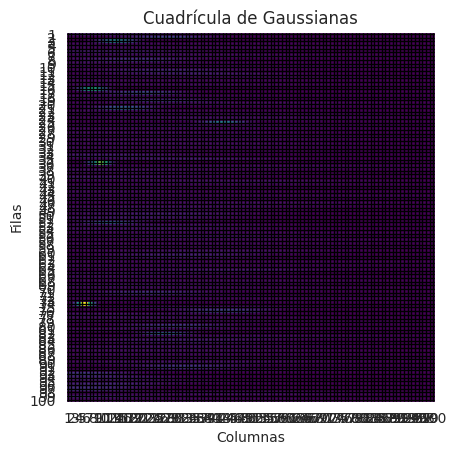

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Dimensiones de la cuadrícula
N = 100

# Crear la cuadrícula
grid = np.zeros((N, N))

# Generar las Gaussianas
for i in range(N):
    #mu = N // 2  # centro de la Gaussiana
    sigma = random.uniform(1, N / 2)  # sigma aleatorio
    mu=random.uniform(1, N / 2)
    x = np.arange(0, N)
    y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
    grid[i, :] = y

# Normalizar los valores entre 0 y 1
grid = grid / np.max(grid)

# Crear el gráfico
fig, ax = plt.subplots()
im = ax.imshow(grid, cmap='viridis')

# Configurar los ejes
ax.set_xticks(np.arange(N))
ax.set_yticks(np.arange(N))
ax.set_xticklabels(np.arange(1, N+1))
ax.set_yticklabels(np.arange(1, N+1))
ax.set_xlabel("Columnas")
ax.set_ylabel("Filas")
ax.set_title("Cuadrícula de Gaussianas")

# Mostrar la cuadrícula
ax.grid(True, which='both', color='black', linewidth=1)


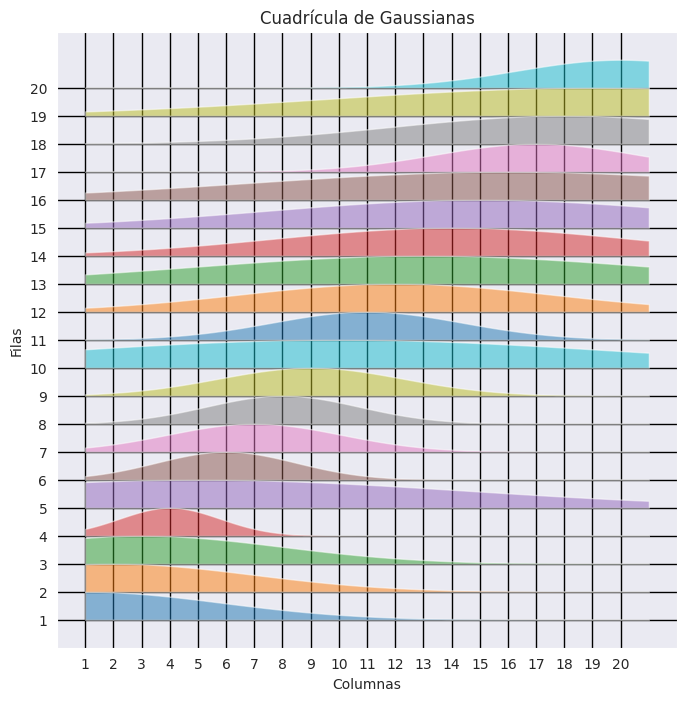

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Dimensiones de la cuadrícula
N = 20

# Crear la cuadrícula
grid = np.zeros((N, N))

# Generar las Gaussianas
fig, ax = plt.subplots(figsize=(8, 8))
for i in range(N):
    mu = i  # centro de la Gaussiana varía desde 0 hasta N-1
    sigma = random.uniform(1, N / 2)  # sigma aleatorio
    x = np.linspace(0, N, 500)  # Aumentar el número de puntos para una curva más suave
    y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
    y = y / np.max(y)  # Normalizar la altura a 1
    y_scaled = y   # Escalar la altura según el alto de la fila
    ax.fill_between(x, i + y_scaled, i, alpha=0.5)

# Configurar los ejes
ax.set_xticks(np.arange(N))
ax.set_yticks(np.arange(N))
ax.set_xticklabels(np.arange(1, N+1))
ax.set_yticklabels(np.arange(1, N+1))
ax.set_xlabel("Columnas")
ax.set_ylabel("Filas")
ax.set_title("Cuadrícula de Gaussianas")

# Mostrar la cuadrícula
ax.grid(True, which='both', color='black', linewidth=1)

plt.show()


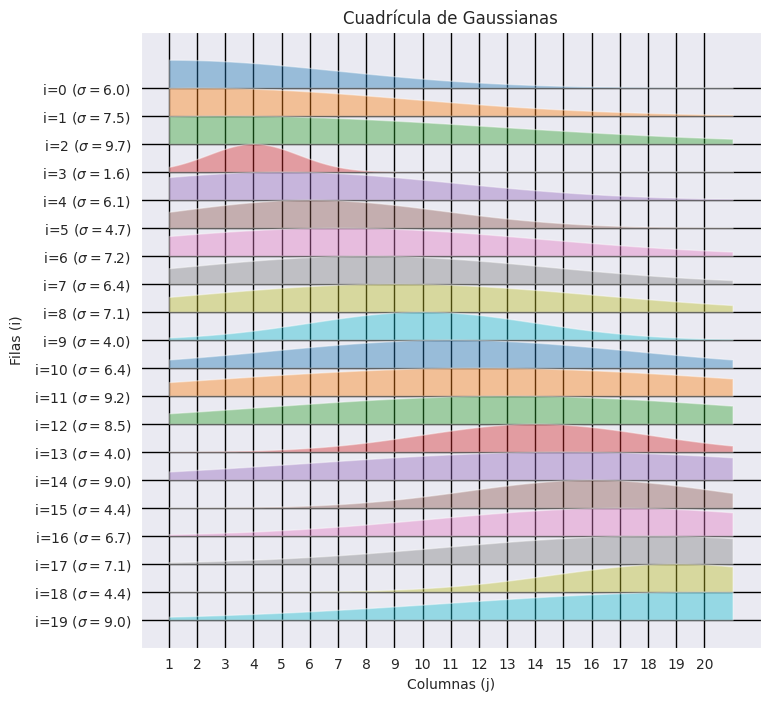

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Dimensiones de la cuadrícula
N = 20

# Crear la cuadrícula
grid = np.zeros((N, N))

# Generar las Gaussianas
fig, ax = plt.subplots(figsize=(8, 8))
sigmas = []  # Lista para guardar los valores de sigma
for i in range(N):
    mu = i  # centro de la Gaussiana varía desde 0 hasta N-1
    sigma = random.uniform(1, N / 2)  # sigma aleatorio
    sigmas.append(sigma)  # Agregar sigma a la lista
    x = np.linspace(0, N, 500)  # Aumentar el número de puntos para una curva más suave
    y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
    y = -y / np.max(y)  # Normalizar la altura a 1
    y_scaled = y   # Escalar la altura según el alto de la fila
    ax.fill_between(x, i + y_scaled, i, alpha=0.4)

# Configurar los ejes
ax.set_xticks(np.arange(N))
ax.set_yticks(np.arange(N))
ax.set_xticklabels(np.arange(1, N+1))
yticklabels = [f' i={i} ($\\sigma = {sigma:.1f})$' for i,sigma in enumerate(sigmas)]  # Crear las etiquetas para el eje Y
ax.set_yticklabels(yticklabels)
ax.set_xlabel("Columnas (j)")
ax.set_ylabel("Filas (i)")
ax.set_title("Cuadrícula de Gaussianas")

# Invertir el eje Y
ax.invert_yaxis()

# Mostrar la cuadrícula
ax.grid(True, which='both', color='black', linewidth=1)

plt.show()


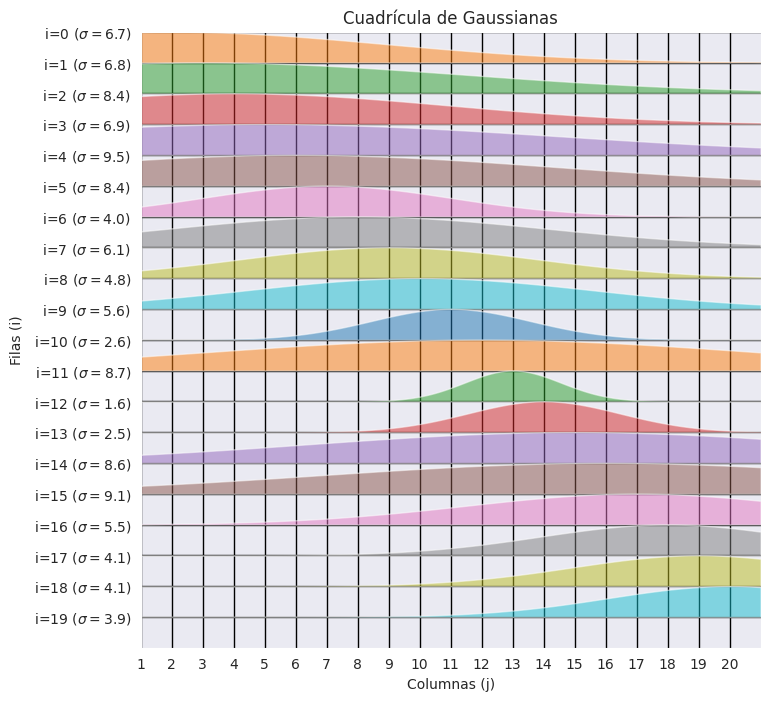

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Dimensiones de la cuadrícula
N = 20

# Crear la cuadrícula
grid = np.zeros((N, N))

# Generar las Gaussianas
fig, ax = plt.subplots(figsize=(8, 8))
sigmas = []  # Lista para guardar los valores de sigma
for i in range(N):
    mu = i  # centro de la Gaussiana varía desde 0 hasta N-1
    sigma = random.uniform(1, N / 2)  # sigma aleatorio
    sigmas.append(sigma)  # Agregar sigma a la lista
    x = np.linspace(0, N, 500)  # Aumentar el número de puntos para una curva más suave
    y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
    y = -y / np.max(y)  # Normalizar la altura a 1
    y_scaled = y   # Escalar la altura según el alto de la fila
    ax.fill_between(x, i + y_scaled, i, alpha=0.5)

# Configurar los ejes
ax.set_xticks(np.arange(N) )  # Ajustar las marcas en el eje X
ax.set_yticks(np.arange(N) )  # Ajustar las marcas en el eje Y
ax.set_xticklabels(np.arange(1, N+1))
yticklabels = [f' i={i} ($\\sigma = {sigma:.1f})$' for i,sigma in enumerate(sigmas)]  # Crear las etiquetas para el eje Y
ax.set_yticklabels(yticklabels)
ax.set_xlabel("Columnas (j)")
ax.set_ylabel("Filas (i)")
ax.set_title("Cuadrícula de Gaussianas")

# Establecer límites para los ejes X e Y
ax.set_xlim(0, N)
ax.set_ylim(0, N)

# Invertir el eje Y
ax.invert_yaxis()

# Mostrar la cuadrícula
ax.grid(True, which='both', color='black', linewidth=1)

plt.show()


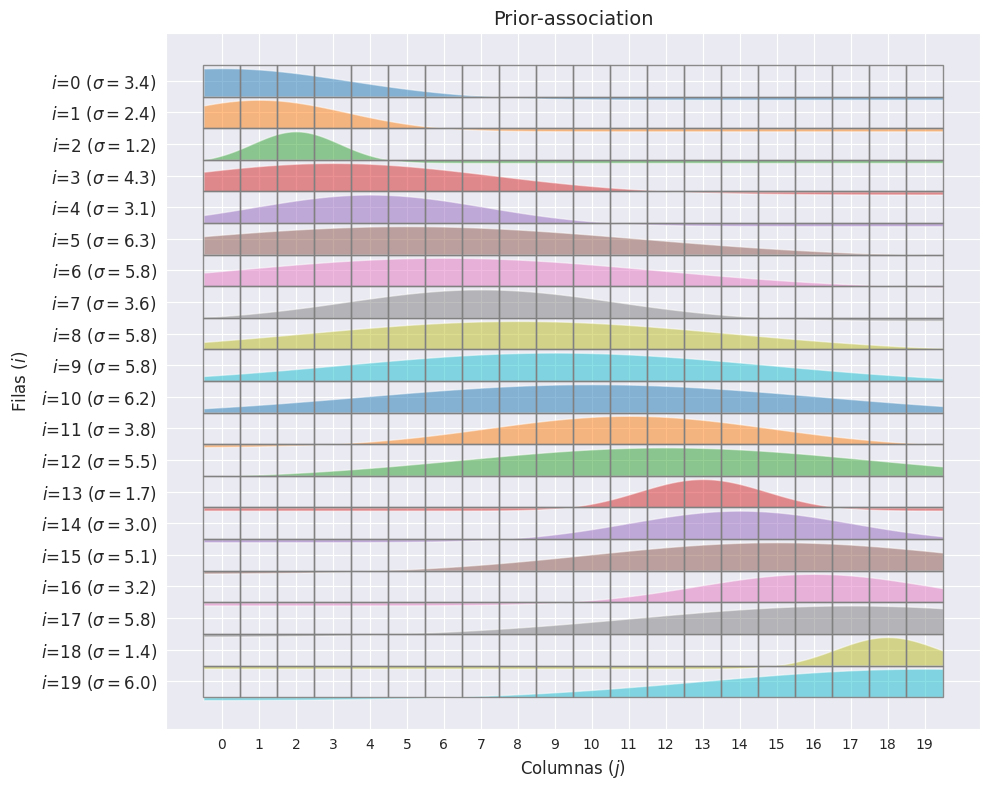

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.patches import Rectangle

# Dimensiones de la cuadrícula
N = 20

# Generar las Gaussianas
fig, ax = plt.subplots(figsize=(10, 8))
sigmas = []  # Lista para guardar los valores de sigma
for i in range(N):
    mu = i+0.5  # centro de la Gaussiana varía desde 0 hasta N-1
    sigma = random.uniform(0.8, N / 3)  # sigma aleatorio
    sigmas.append(sigma)  # Agregar sigma a la lista
    x = np.linspace(0, N, 500)  # Aumentar el número de puntos para una curva más suave
    y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
    y = -y / np.max(y)+0.1  # Normalizar la altura a 1
    y_scaled = y   # Escalar la altura según el alto de la fila
    ax.fill_between(x, i + y_scaled, i, alpha=0.5)

# Crear cuadrícula de NxN utilizando objetos Rectangle
for i in range(N):
    for j in range(N):
        rect = Rectangle((j, i-1), 1, 1, edgecolor='grey',alpha=0.9, facecolor='none', linewidth=1)
        ax.add_artist(rect)

# Configurar los ejes
ax.set_xticks(np.arange(N) + 0.5)  # Ajustar las marcas en el eje X
ax.set_yticks(np.arange(-1,N-1) + 0.5)  # Ajustar las marcas en el eje Y
ax.set_xticklabels(np.arange(0, N))
yticklabels = [f' $i$={i} ($\\sigma = {sigma:.1f})$' for i,sigma in enumerate(sigmas)]  # Crear las etiquetas para el eje Y
ax.set_yticklabels(yticklabels,fontsize=12)
ax.set_xlabel("Columnas ($j$)",fontsize=12)
ax.set_ylabel("Filas ($i$)",fontsize=12)
ax.set_title("Prior-association",fontsize=14)

# Establecer límites para los ejes X e Y
ax.set_xlim(-1, N+1)
ax.set_ylim(-2, N)

# Invertir el eje Y
ax.invert_yaxis()

plt.tight_layout()